In [3354]:
import pandas as pd
import numpy as np

In [3452]:
df = pd.read_csv('yerevan_train.csv', index_col=0)

In [3453]:
df

price       condition          district  max_floor  \
0      65000.0            good            Center          9   
1     140000.0  newly repaired           Arabkir         10   
2      97000.0  newly repaired            Center         10   
3      47000.0            good            Center          9   
4      51000.0  newly repaired            Center         14   
5      44900.0            good            Center          9   
7      67000.0  newly repaired           Arabkir          5   
8     143000.0  newly repaired            Center          9   
9      27000.0  newly repaired         Shengavit          3   
12     34500.0            good              Avan         14   
13     38700.0  newly repaired  Malatia-Sebastia         14   
14    150000.0  newly repaired    Qanaqer-Zeytun         10   
15    161000.0  zero condition            Center         14   
16     49000.0            good           Arabkir          9   
17    110000.0  newly repaired           Arabkir          7   
18     42000.0  newly repaired           Arabkir          5   
19     60000.0  newly repaired            Center         10   
20    115000.0  newly repaired           Arabkir         10   
21     34000.0            good          Nor Norq          5   
22     45000.0            good         Achapnyak          9   
23     87000.0  newly repaired           Arabkir         10   
24     90000.0            good           Arabkir          5   
25     33000.0  zero condition         Shengavit          9   
27     80000.0  newly repaired         Davtashen         19   
28    150000.0  newly repaired            Center          9   
29     36000.0  newly repaired         Achapnyak          5   
30     75000.0  newly repaired         Davtashen         15   
31     28500.0            good         Achapnyak         16   
32     35000.0  newly repaired         Achapnyak         12   
33     59000.0  newly repaired            Center          9   
...        ...             ...               ...        ...   
4362   57000.0            good            Center          9   
4363   65000.0            good           Arabkir         14   
4364   64000.0  newly repaired            Center          5   
4365   62000.0  newly repaired         Davtashen          9   
4366   40000.0  newly repaired  Malatia-Sebastia          9   
4368   50000.0  newly repaired           Arabkir         16   
4369  105000.0  newly repaired            Center         14   
4370   54000.0  newly repaired            Center          5   
4371   97000.0  newly repaired            Center         12   
4372   70000.0            good           Arabkir          9   
4373  235000.0  newly repaired            Center         10   
4374   34000.0            good          Nor Norq         12   
4375   45000.0            good           Arabkir          9   
4376  230000.0  newly repaired            Center         17   
4377  330000.0  newly repaired            Center         12   
4378  240000.0            good            Center         18   
4379  250000.0  zero condition            Center         14   
4380   55000.0            good           Arabkir          5   
4381   43000.0            good    Qanaqer-Zeytun         13   
4382  150000.0            good            Center          5   
4383   46000.0  newly repaired           Arabkir          5   
4385  110000.0  newly repaired            Center         20   
4386   88200.0  newly repaired            Center         14   
4387  175000.0  newly repaired            Center          6   
4388  237600.0  zero condition            Center         12   
4389   39000.0  zero condition            Center          5   
4390   85000.0  newly repaired            Center         14   
4391   35000.0  newly repaired            Center          9   
4392   65000.0  newly repaired            Center          3   
4393   30600.0  newly repaired  Malatia-Sebastia          9   

                           street  num_rooms   region   area  \
0                   Vardanants St     

In [3454]:
"""Get corresponding values of features based."""

def get_district_value(district):
    """Get value basied on district.
    
    parameters:
    district (str): district name.
    
    returns:
    int: corresponsing value for given district.
    """
    return {
        'Center': 13,
        'Arabkir': 4,
#         'Shengavit': 3,
#         'Avan': 3,
#         'Malatia-Sebastia': 3,
#         'Qanaqer-Zeytu': 3,
#         'Nor Norq': 3,
#         'Davtashen': 3,
#         'Erebuni': 3,
#         'Norq Marash': 0,
#         'Nubarashen': 0,
#         'Vahagni district': 0
    }.get(district, 0)

def get_condition_value(condition):
    """Get value basied on condition.
    
    parameters:
    condition (str): apartment condition.
    
    returns:
    int: corresponsing value for given apartment condition.
    """
    return {
        'newly repaired': 4,
        'good': 2,
#         'zero condition': 1
    }.get(condition, 0)

def get_building_type_value(building_type):
    """Get value basied on building_type.
    
    parameters:
    building_type (str): material used in apartment.
    
    returns:
    int: corresponsing value for given building type.
    """
    return {
        'monolit': 5,
        'other': 3,
        'stone': 3,
        'panel': 2
    }.get(building_type, 0)

In [3455]:
"""Create 'streets' dict for hloding all unique street names and 
   their value based on the amount of house prices there."""
streets = {}
for num, value in enumerate(df.street.unique()):
    index = np.where(df.street.unique() == value)[0][0]
    length = df.street.unique().shape[0]
    streets[value] = 10 if index <= length//3 else 5
#     streets[value] = 10 if index <= length//3 else 5 if length//3 < index <= length//6 else 2
# streets

In [3456]:
def get_feature_value(feature_name, feature):
    """Access all created values for features.
    
    parameters:
    feature_name (str): name of apartment feature.
    feature (str): apartment feature itself.
    feature (int/float): already measured value for given feature.
    
    returns:
    (int): corresponging value for given feature name and feature.
    """
    if not type(feature) is str:
        return {
            'floor': 5 if feature <= 16 else 0,
            'max_floor': 4 if feature <= 16 else 1
        }.get(feature_name, feature)
    return {
        'building_type': get_building_type_value(feature),
        'district': get_district_value(feature),
        'condition': get_condition_value(feature),
        'street': streets.get(feature, 0)
    }.get(feature_name, feature)

In [3457]:
def featurize(apartment):
    """
    :param datum: single house information in dict
    :return: (x, y) tuple, where x is a numpy vector, and y is a number
    """
    
    """Add single apartment features(except thous that are removed) to 'features' list."""
    features = [1]
    price = apartment.pop('price')
    del apartment['region']
    del apartment['url']
    
    features.append(apartment.pop('area'))
    for feature_name in apartment:
        features.append(get_feature_value(feature_name, apartment[feature_name]))
        
    return np.array(features), price

In [3458]:
featurize(dict(df.loc[1]))

(array([  1., 115.,   4.,   4.,   4.,  10.,   4.,   1.,   5.,   5.,   3.]),
 140000.0)

In [3459]:
def get_data(df):
    """
    :param df: all apartment infomation in DataFrame
    :return: X, Y, where X(each row is a data element) is matrix and Y(response vector)
    """
    X, Y = [], []
    for _, datum in df.iterrows():
        x, y = featurize(dict(datum))
        X.append(x)
        Y.append(y)
    return np.array(X), np.array(Y)

In [3460]:
X, Y = get_data(df)

In [3461]:
def fit_ridge_regression(X, Y, l=0.1):
    """
    :param X: A numpy matrix, where each row is a data element (X)
    :param Y: A numpy vector of responses for each of the rows (y)
    :param l: ridge variable
    :return: A vector containing the hyperplane equation (beta)
    """
    # TODO, fill ridge regression part
    X, Y = np.array(X), np.array(Y)
    beta = np.linalg.inv(l * np.eye(X.shape[1]) + X.T.dot(X)).dot(X.T).dot(Y)
    return beta

In [3462]:
weights = fit_ridge_regression(X, Y)

In [3463]:
weights

array([-85457.12390817,   1230.51608251,   6298.83689107,   3288.84143872,
        -2710.70703463,   1560.76983018,  -7249.14852387,  15308.82518084,
         7278.54176241,  -9100.28623699,  18109.72691758])

In [3464]:
def rmsq_loss(Y_predicted, Y):
    return (sum((Y_predicted - Y)**2)/len(Y))**0.5

In [3465]:
rmsq_loss(X.dot(weights), Y)

29588.7329542037

In [3466]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"]=16,9

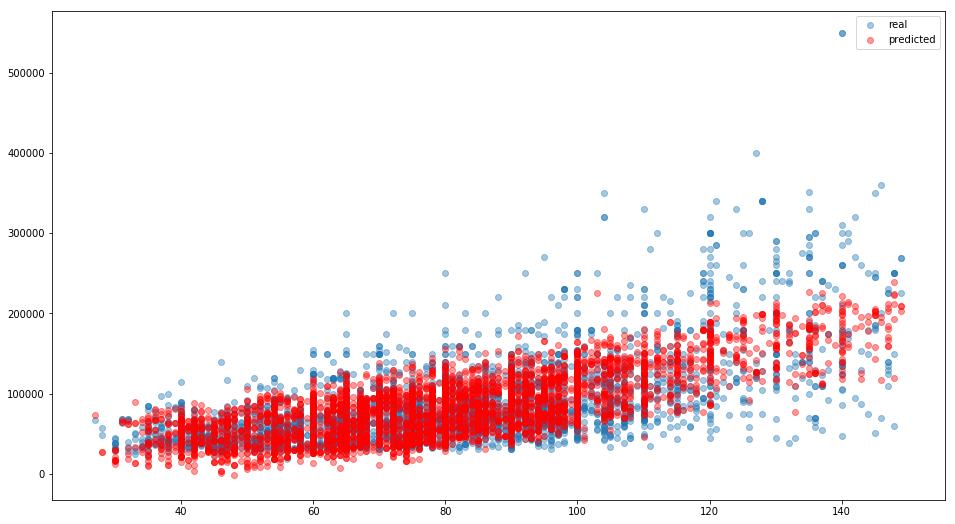

In [3467]:
plt.scatter(df['area'], df["price"], label="real", alpha=0.4)
plt.scatter(X[:, 1], X.dot(weights), label="predicted", c="r", alpha=0.4)
plt.legend();

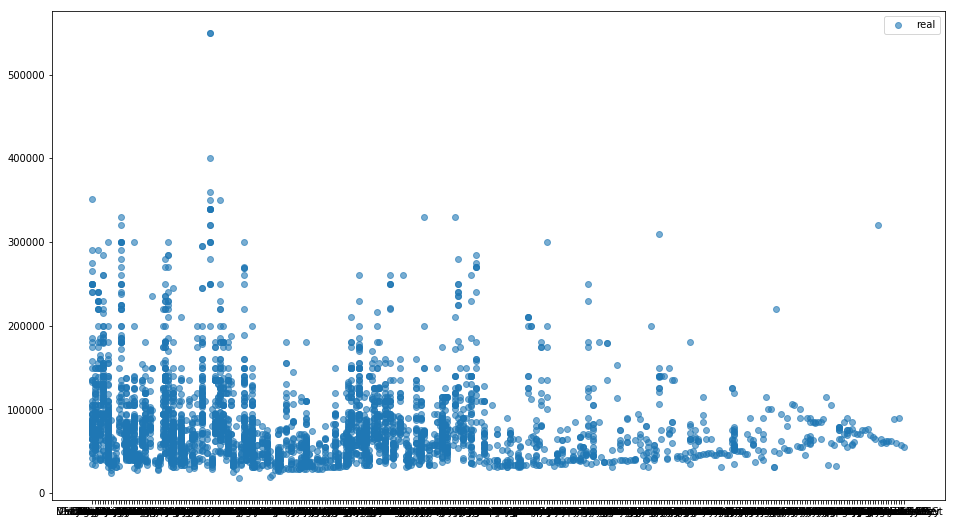

In [3468]:
plt.scatter(df["street"], df["price"], label="real", alpha=0.6)
plt.legend();

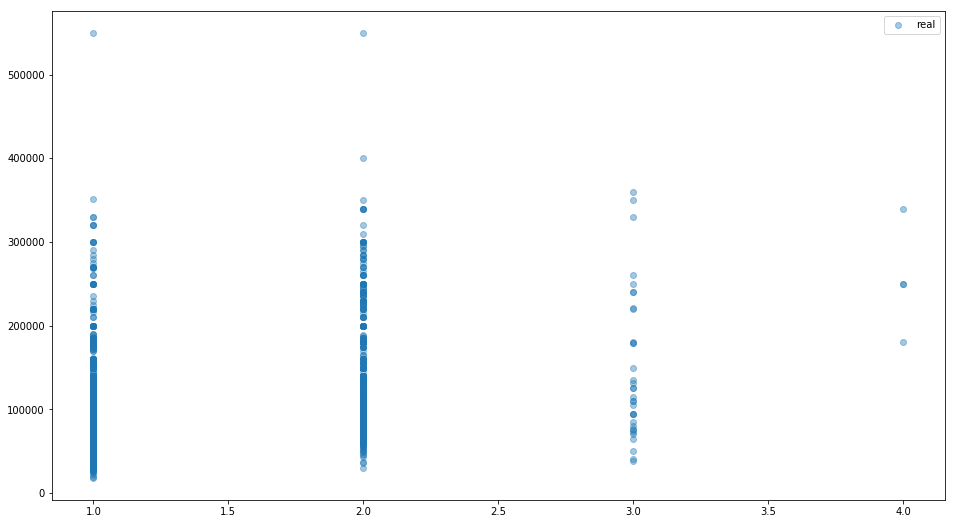

In [3469]:
plt.scatter(df["num_bathrooms"], df["price"], label="real", alpha=0.4)
plt.legend();

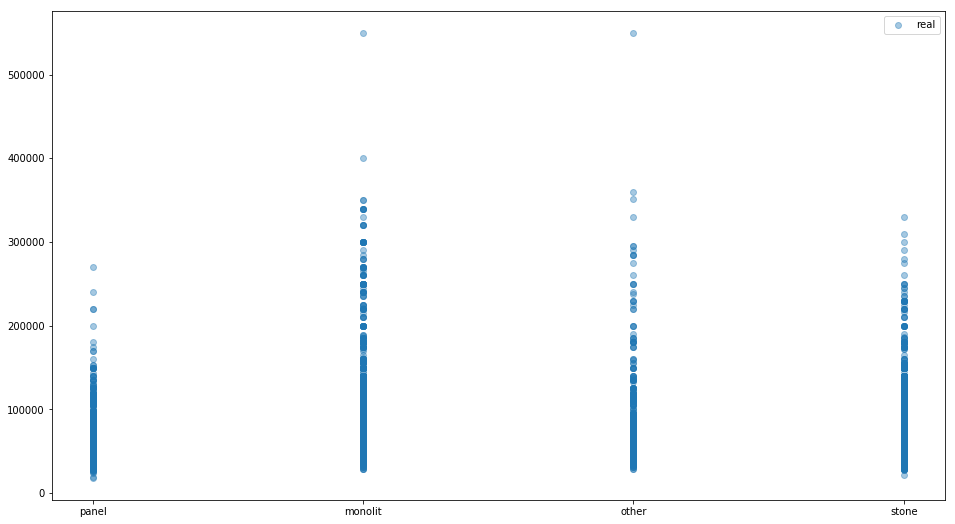

In [3427]:
plt.scatter(df["building_type"], df["price"], label="real", alpha=0.4)
plt.legend();

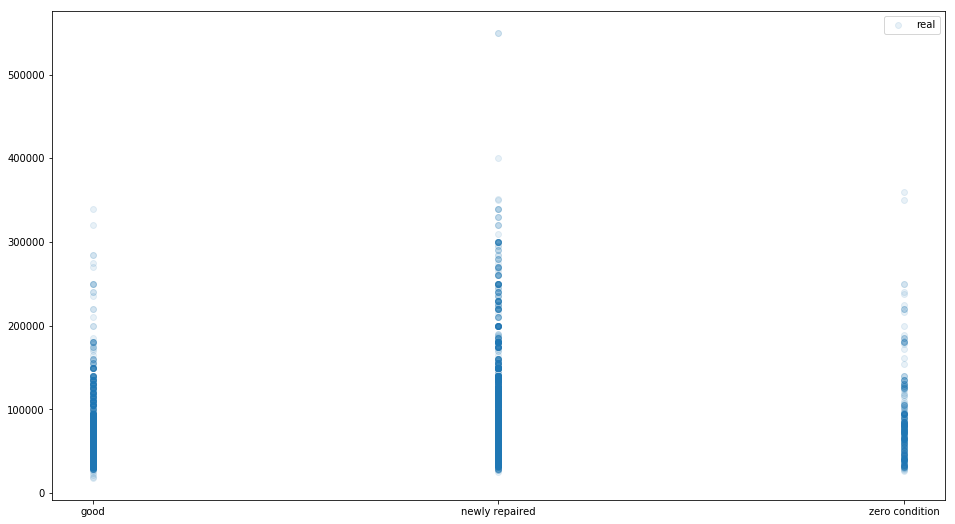

In [3428]:
plt.scatter(df["condition"], df["price"], label="real", alpha=0.1)
plt.legend();

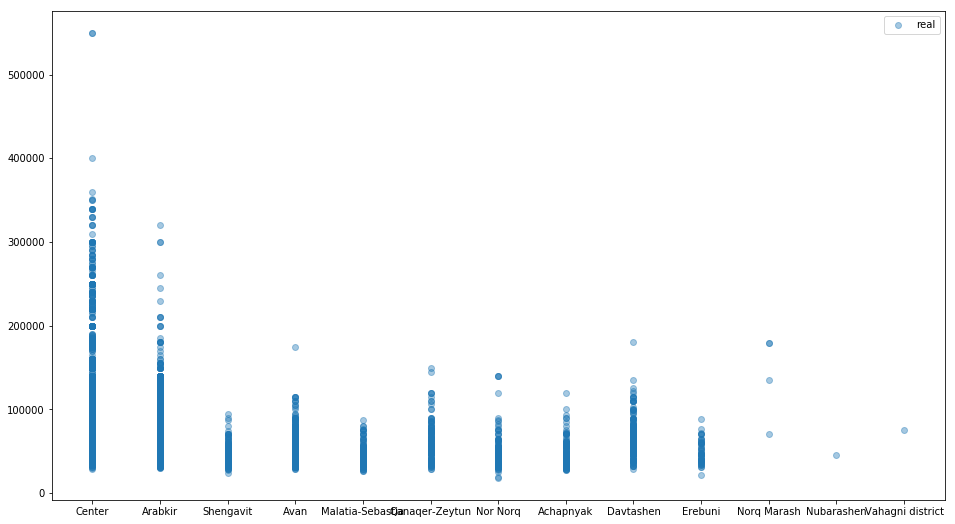

In [3429]:
plt.scatter(df["district"], df["price"], label="real", alpha=0.4)
plt.legend();

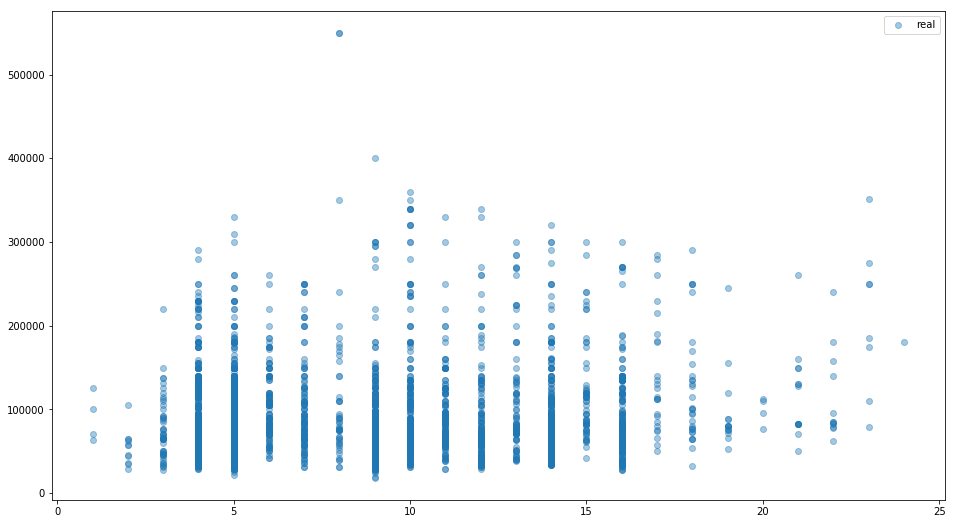

In [3430]:
plt.scatter(df["max_floor"], df["price"], label="real", alpha=0.4)
plt.legend();

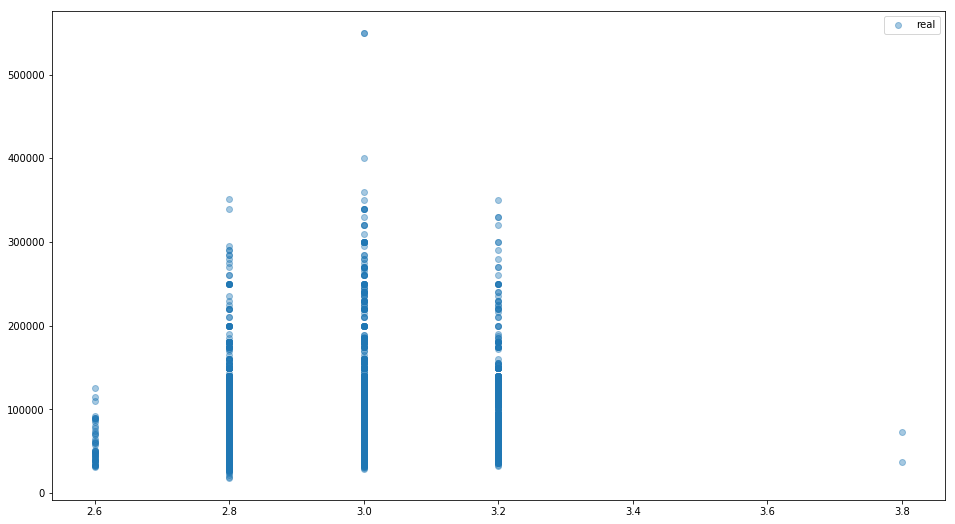

In [3431]:
plt.scatter(df["ceiling_height"], df["price"], label="real", alpha=0.4)
plt.legend();

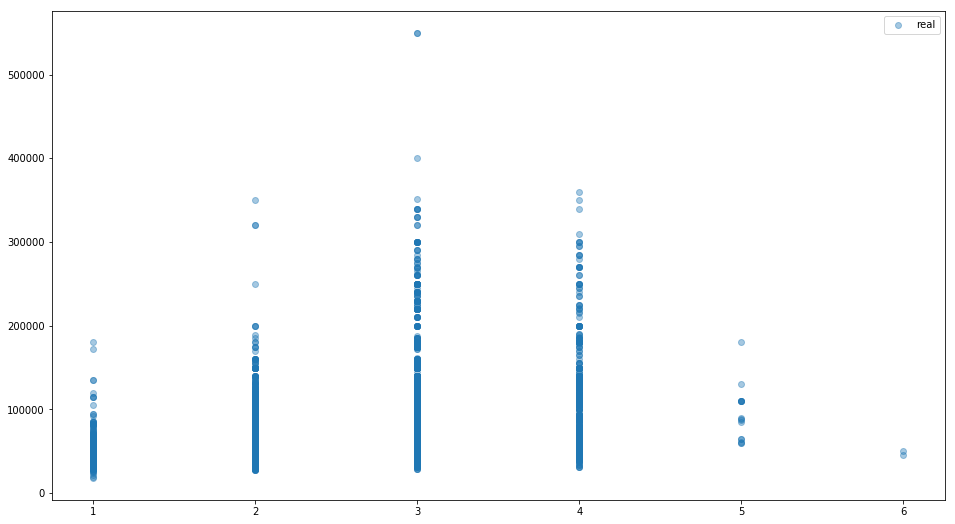

In [3432]:
plt.scatter(df["num_rooms"], df["price"], label="real", alpha=0.4)
plt.legend();

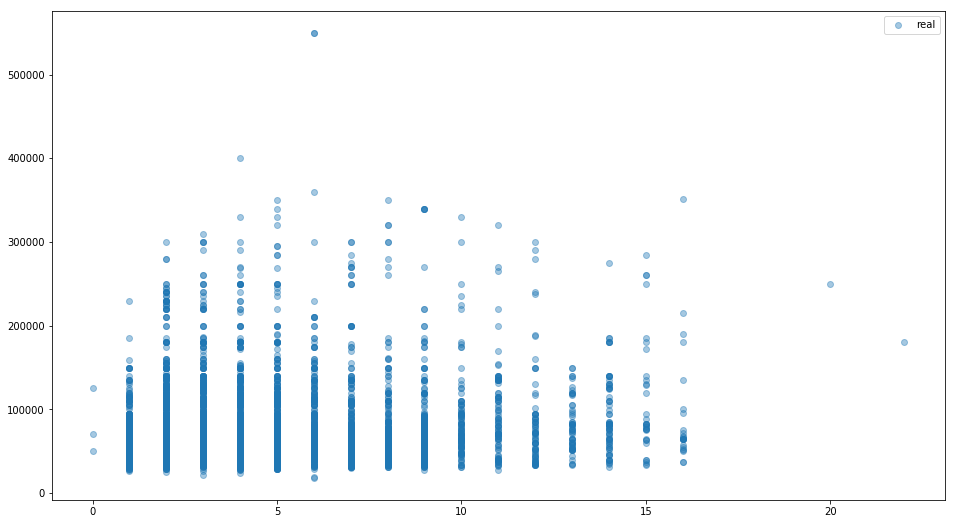

In [3433]:
plt.scatter(df["floor"], df["price"], label="real", alpha=0.4)
plt.legend();

In [3434]:
def cross_validate(X, Y, fitter, folds=5):
    """
    :param X: A numpy matrix, where each row is a data element (X)
    :param Y: A numpy vector of responses for each of the rows (y)
    :param fitter: A function that takes X, Y as parameters and returns beta
    :param folds: number of cross validation folds (parts)
    :return: corss-validation score
    """
    scores = []
    for i in range(folds):
        train_indices  = np.ones(len(X), dtype=bool)
        train_indices[i::folds] = 0
        test_indices = np.array([not elem for elem in train_indices])

        w = fitter(X[train_indices], Y[train_indices])
        scores.append(rmsq_loss(X[test_indices].dot(w), Y[test_indices]))
    return sum(scores)/folds

In [3435]:
cross_validate(X, Y, fit_ridge_regression)

29561.552216453176

In [3387]:
weights = fit_ridge_regression(X, Y)

In [3384]:
df_test = pd.read_csv('terevan_test.csv', index_col=0)

In [3385]:
X_test, Y_test = get_data(df_test)

In [3386]:
rmsq_loss(X_test.dot(weights), Y_test)